In [1]:
import pandas as pd

df = pd.read_csv('../shiba_data_4_2_2022.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         553 non-null    object 
 1   Open                         553 non-null    float64
 2   High                         553 non-null    float64
 3   Low                          553 non-null    float64
 4   Close                        553 non-null    float64
 5   Adj Close                    553 non-null    float64
 6   Volume                       553 non-null    int64  
 7   facebook_likes               0 non-null      float64
 8   twitter_followers            213 non-null    float64
 9   reddit_average_posts_48h     539 non-null    float64
 10  reddit_average_comments_48h  539 non-null    float64
 11  reddit_subscribers           319 non-null    float64
 12  reddit_accounts_active_48h   319 non-null    float64
 13  forks               

In [2]:
#Uklanjam sve gde fale celi podaci
to_delete = ['facebook_likes', 'forks', 'stars', 'subscribers', 'total_issues', 'closed_issues', 'pull_requests_merged',
             'pull_request_contributors', 'commit_count_4_weeks']

for col in to_delete:
    del df[col]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         553 non-null    object 
 1   Open                         553 non-null    float64
 2   High                         553 non-null    float64
 3   Low                          553 non-null    float64
 4   Close                        553 non-null    float64
 5   Adj Close                    553 non-null    float64
 6   Volume                       553 non-null    int64  
 7   twitter_followers            213 non-null    float64
 8   reddit_average_posts_48h     539 non-null    float64
 9   reddit_average_comments_48h  539 non-null    float64
 10  reddit_subscribers           319 non-null    float64
 11  reddit_accounts_active_48h   319 non-null    float64
 12  shiba inu coin_unscaled      553 non-null    int64  
 13  shiba inu coin_month

In [3]:
213/553*100
del df['twitter_followers']
del df['isPartial']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         553 non-null    object 
 1   Open                         553 non-null    float64
 2   High                         553 non-null    float64
 3   Low                          553 non-null    float64
 4   Close                        553 non-null    float64
 5   Adj Close                    553 non-null    float64
 6   Volume                       553 non-null    int64  
 7   reddit_average_posts_48h     539 non-null    float64
 8   reddit_average_comments_48h  539 non-null    float64
 9   reddit_subscribers           319 non-null    float64
 10  reddit_accounts_active_48h   319 non-null    float64
 11  shiba inu coin_unscaled      553 non-null    int64  
 12  shiba inu coin_monthly       552 non-null    float64
 13  scale               

In [4]:
df.isna().sum(axis = 0)

Date                             0
Open                             0
High                             0
Low                              0
Close                            0
Adj Close                        0
Volume                           0
reddit_average_posts_48h        14
reddit_average_comments_48h     14
reddit_subscribers             234
reddit_accounts_active_48h     234
shiba inu coin_unscaled          0
shiba inu coin_monthly           1
scale                            1
shiba inu coin                   1
dtype: int64

In [5]:
to_interpolate = ['reddit_average_posts_48h', 'reddit_average_comments_48h', 'reddit_subscribers',
                  'reddit_accounts_active_48h', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']
import scipy
for variable in to_interpolate:
    df[variable] = df[variable].interpolate(method='slinear').interpolate(method='linear')
df.isna().sum(axis = 0)



Date                             0
Open                             0
High                             0
Low                              0
Close                            0
Adj Close                        0
Volume                           0
reddit_average_posts_48h         0
reddit_average_comments_48h      0
reddit_subscribers             234
reddit_accounts_active_48h     234
shiba inu coin_unscaled          0
shiba inu coin_monthly           1
scale                            1
shiba inu coin                   1
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         553 non-null    object 
 1   Open                         553 non-null    float64
 2   High                         553 non-null    float64
 3   Low                          553 non-null    float64
 4   Close                        553 non-null    float64
 5   Adj Close                    553 non-null    float64
 6   Volume                       553 non-null    int64  
 7   reddit_average_posts_48h     553 non-null    float64
 8   reddit_average_comments_48h  553 non-null    float64
 9   reddit_subscribers           319 non-null    float64
 10  reddit_accounts_active_48h   319 non-null    float64
 11  shiba inu coin_unscaled      553 non-null    int64  
 12  shiba inu coin_monthly       552 non-null    float64
 13  scale               

In [7]:
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,shiba inu coin_unscaled,shiba inu coin_monthly,scale,shiba inu coin
548,31/01/2022,0.000021,0.000022,0.000020,0.000021,0.000021,531285879,6.182,586.182,463670.0,684.666667,47,6.0,0.06,2.82
549,01/02/2022,0.000021,0.000022,0.000021,0.000022,0.000022,519254046,6.800,475.700,463832.0,630.090909,94,6.0,0.06,5.64
550,02/02/2022,0.000022,0.000022,0.000020,0.000021,0.000021,484518640,7.889,499.667,463900.0,615.700000,100,6.0,0.06,6.00
551,03/02/2022,0.000021,0.000021,0.000020,0.000021,0.000021,421850042,8.889,652.556,464046.0,680.200000,76,6.0,0.06,4.56
552,04/02/2022,0.000021,0.000022,0.000021,0.000021,0.000021,476443712,7.000,412.667,464142.0,696.307692,96,6.0,0.06,5.76


In [8]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,shiba inu coin_unscaled,shiba inu coin_monthly,scale,shiba inu coin
0,01/08/2020,0.0,0.0,0.0,0.0,0.0,1604789,0.0,0.0,NaN,NaN,0,NaN,NaN,NaN
1,02/08/2020,0.0,0.0,0.0,0.0,0.0,193098,0.0,0.0,NaN,NaN,0,0.0,0.0,0.0
2,03/08/2020,0.0,0.0,0.0,0.0,0.0,129225,0.0,0.0,NaN,NaN,0,0.0,0.0,0.0
3,04/08/2020,0.0,0.0,0.0,0.0,0.0,19717,0.0,0.0,NaN,NaN,0,0.0,0.0,0.0
4,05/08/2020,0.0,0.0,0.0,0.0,0.0,26869,0.0,0.0,NaN,NaN,0,0.0,0.0,0.0


In [9]:
#Linearna interpolacija ne radi za polja kojima se ne znaju vrednosti od prvog dana, pri dan u uzorku popunjavam nulama
to_fill = ['reddit_subscribers','reddit_accounts_active_48h', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']
for fill in to_fill:
    df.loc[0, fill] = 0

In [10]:
df.isna().sum(axis = 0)


Date                             0
Open                             0
High                             0
Low                              0
Close                            0
Adj Close                        0
Volume                           0
reddit_average_posts_48h         0
reddit_average_comments_48h      0
reddit_subscribers             233
reddit_accounts_active_48h     233
shiba inu coin_unscaled          0
shiba inu coin_monthly           0
scale                            0
shiba inu coin                   0
dtype: int64

In [11]:
to_interpolate = ['reddit_subscribers','reddit_accounts_active_48h']
import scipy
for variable in to_interpolate:
    df[variable] = df[variable].interpolate(method='slinear').interpolate(method='linear')
df.isna().sum(axis = 0)


Date                           0
Open                           0
High                           0
Low                            0
Close                          0
Adj Close                      0
Volume                         0
reddit_average_posts_48h       0
reddit_average_comments_48h    0
reddit_subscribers             0
reddit_accounts_active_48h     0
shiba inu coin_unscaled        0
shiba inu coin_monthly         0
scale                          0
shiba inu coin                 0
dtype: int64

In [12]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df.to_csv('../shiba_v1.csv')

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


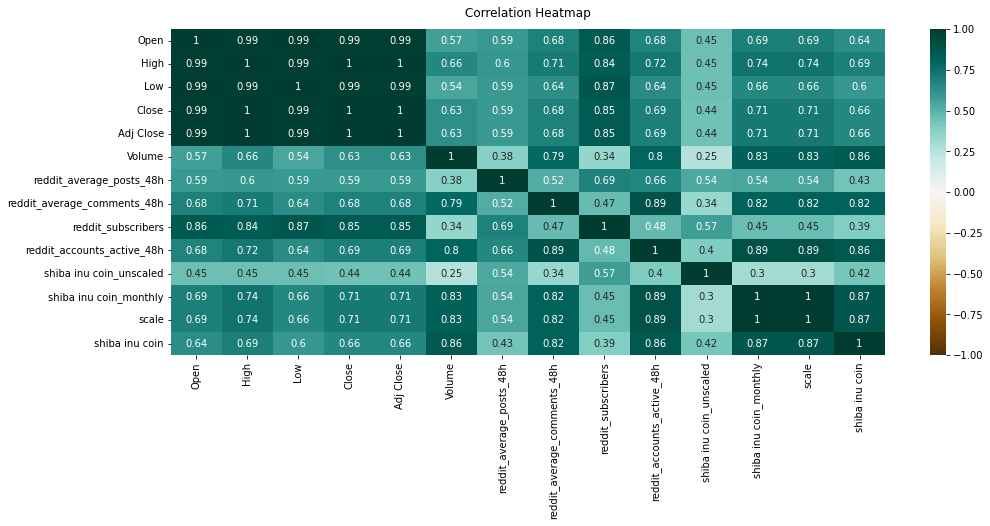

In [13]:
!{sys.executable} -m pip install  matplotlib
!{sys.executable} -m pip install seaborn
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('../shiba_heatmap.png', dpi=300, bbox_inches='tight')

In [14]:
del df['shiba inu coin_unscaled']

In [15]:
#Izbacujem grupu finansijskih nezavisnih promenljivih sa stepenom korelacije 0.99 i 1
to_remove_high_multicolinearity = ['Open', 'Low', 'Adj Close']
for variable in to_remove_high_multicolinearity:
    del df[variable]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 553 entries, 2020-08-01 to 2022-02-04
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   High                         553 non-null    float64
 1   Close                        553 non-null    float64
 2   Volume                       553 non-null    int64  
 3   reddit_average_posts_48h     553 non-null    float64
 4   reddit_average_comments_48h  553 non-null    float64
 5   reddit_subscribers           553 non-null    float64
 6   reddit_accounts_active_48h   553 non-null    float64
 7   shiba inu coin_monthly       553 non-null    float64
 8   scale                        553 non-null    float64
 9   shiba inu coin               553 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 47.5 KB


In [16]:
del df['scale']

In [17]:
df.to_csv('../shiba_v2.csv')